In [1]:
import pandas as pd
import os
os.getcwd()

'D:\\study\\keras\\0801'

In [2]:
os.chdir('D:\\study\\kaggle\\titan2\\data\\')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [5]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape
test.shape

(418, 11)

In [85]:
train.shape

(891, 12)

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [88]:
train.isnull().sum()   # train의 결손 값 수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
test.isnull().sum()   # test의 결손값 수

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [91]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked=True, figsize=(10,5))

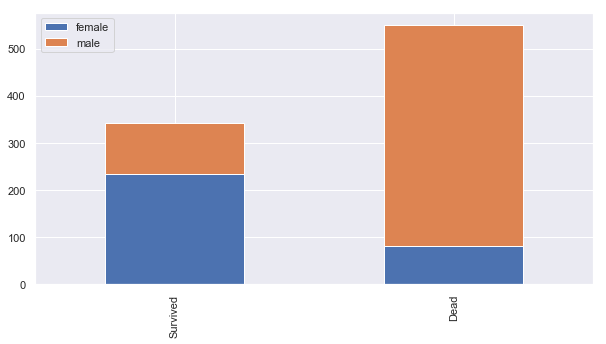

In [92]:
bar_chart('Sex')   # 성별에 따라 죽었는지 살았는지

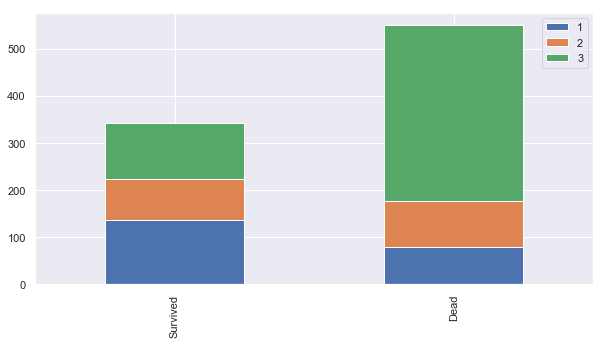

In [93]:
bar_chart('Pclass')   # 클래스에 따라서 죽었는지 알았는지

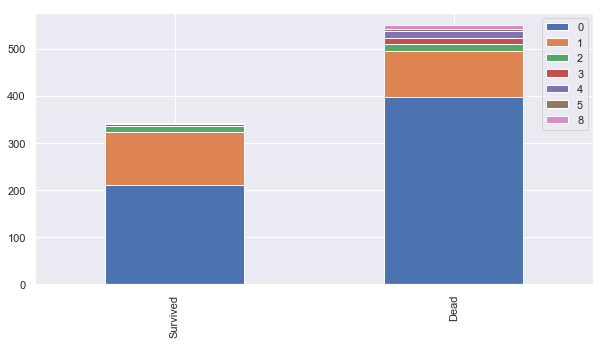

In [94]:
bar_chart('SibSp')   # r가족수에 따라

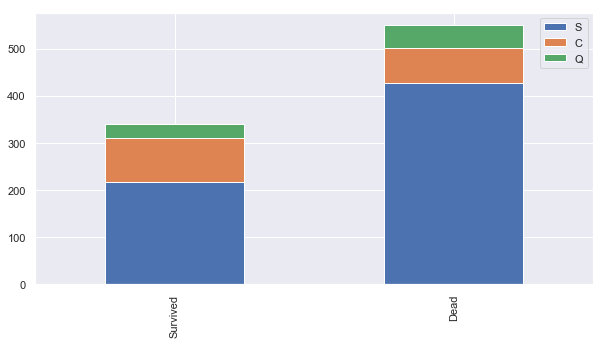

In [95]:
bar_chart('Embarked')   # 승선한 선착장에 따라

In [96]:
train_test_data = [train,test]   # train과 test 합침

In [97]:
train_test_data

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

In [98]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
    
# 정규표현식을 이용하여 Mr, Mrs등 추출

In [99]:
test['Title'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [100]:
title_mapping={'Mr':0, "Miss":1, 'Mrs':2,    # 이름의 단어에 따라 숫자로 맵핑
               'Master':3, "Dr":3, "Rev":3, "Major":3, 
               "Mlle":3, "Col":3, "Mme":3,
               "Jonkheer":3, "Don":3, "Capt":3, "Ms":3, 
               "Lady":3, "Countess":3, 'Sir':3, 'Dona':3}

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    


In [101]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0


In [102]:
test.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1


In [103]:
train.drop("Name", axis=1, inplace=True)   # Name 컬럼 삭제
test.drop("Name", axis=1, inplace=True)

In [104]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,0


In [105]:
sex_mapping= {'male':0, "female":1}   # 성별을 숫자로 맵핑
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [106]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0


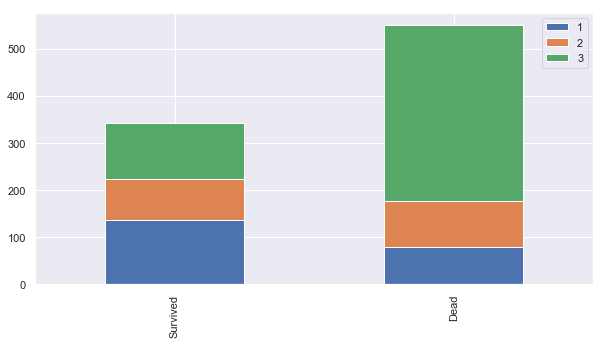

In [107]:
bar_chart('Pclass')

In [108]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
# train의 Age 칼럼의 NaN값을 train의 Parch로 group을 지어서 해당 그룹의 age칼럼의 
# median값으로 대체

In [109]:
test['Age'].fillna(test.groupby('Title')['Age'].transform("median"), inplace=True)

In [110]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2
5,897,3,0,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,1,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,0,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,1,18.0,0,0,2657,7.2292,NaN,C,2
9,901,3,0,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [111]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16,'Age'] =0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26), 'Age'] =1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age'] =2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=46), 'Age'] =3
    dataset.loc[dataset['Age'] >46 ,'Age'] =4

In [112]:
train['Age'].value_counts()

2.0    336
1.0    255
0.0    105
4.0     98
3.0     97
Name: Age, dtype: int64

In [113]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,S,0


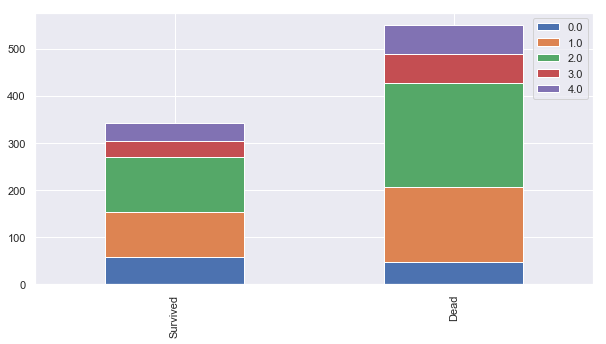

In [114]:
bar_chart('Age')

In [115]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,S,0


In [116]:
pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

In [117]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,S,0


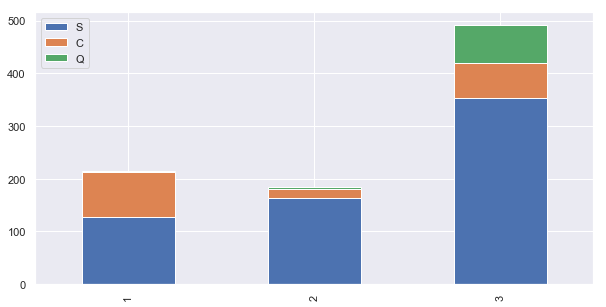

In [118]:
df = pd.DataFrame([pclass1,pclass2,pclass3])
df.index=['1','2','3']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [119]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,S,0


In [120]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [121]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,S,0


In [122]:
embarked_mapping = {'S':0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [123]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,4.0,0,0,17463,51.8625,E46,0,0


In [124]:
train.drop("Fare", axis = 1, inplace=True)   # Fare 컬럼 삭제
test.drop("Fare", axis = 1, inplace=True)   



In [125]:
train.head(7)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,C123,0,2
4,5,0,3,0,2.0,0,0,373450,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,NaN,2,0
6,7,0,1,0,4.0,0,0,17463,E46,0,0


In [126]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[0]

In [127]:
cabin_mapping = {'A':0, "B":0.4, "C": 0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [128]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [129]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,2.0,0,0
5,6,0,3,0,2.0,0,0,330877,2.0,2,0
6,7,0,1,0,4.0,0,0,17463,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,2.0,0,3
8,9,1,3,1,2.0,0,2,347742,2.0,0,2
9,10,1,2,1,0.0,1,0,237736,1.8,1,2


In [130]:
train['FamilySize'] = train['SibSp'] + train['Parch'] +1
test['FamilySize'] = test['SibSp'] + test['Parch'] +1

In [131]:
train['FamilySize'].max()

11

In [132]:
test['FamilySize'].max()

11

In [133]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2,
                 10:3.6, 11:4}

In [134]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [135]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,2.0,0,0,0.0


In [136]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train.drop(features_drop, axis=1, inplace=True)
test.drop(features_drop, axis=1, inplace=True)
train.drop(['PassengerId'], axis=1, inplace=True)

In [137]:
train.head()

,Survived,Pclass,Sex,Age,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,2.0,0,0,0.4
1,1,1,1,3.0,0.8,1,2,0.4
2,1,3,1,1.0,2.0,0,1,0.0
3,1,1,1,2.0,0.8,0,2,0.4
4,0,3,0,2.0,2.0,0,0,0.0


In [138]:
train_data = train.drop('Survived',axis =1)

In [139]:
train_data

,Pclass,Sex,Age,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,2.0,0,0,0.4
1,1,1,3.0,0.8,1,2,0.4
2,3,1,1.0,2.0,0,1,0.0
3,1,1,2.0,0.8,0,2,0.4
4,3,0,2.0,2.0,0,0,0.0
5,3,0,2.0,2.0,2,0,0.0
6,1,0,4.0,1.6,0,0,0.0
7,3,0,0.0,2.0,0,3,1.6
8,3,1,2.0,2.0,0,2,0.8
9,2,1,0.0,1.8,1,2,0.4


In [140]:
target = train['Survived']

In [141]:
target

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [143]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state = 0)

In [144]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.78888889 0.79775281 0.80898876 0.82022472 0.84269663 0.84269663
 0.79775281 0.80898876 0.82022472 0.84269663]


In [145]:
round(np.mean(score)*100,2)

81.71

In [146]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.75555556 0.78651685 0.76404494 0.7752809  0.84269663 0.79775281
 0.80898876 0.80898876 0.75280899 0.7752809 ]


In [147]:
round(np.mean(score)*100,2)

78.68

In [148]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.78888889 0.82022472 0.7752809  0.80898876 0.84269663 0.7752809
 0.82022472 0.83146067 0.76404494 0.78651685]


In [149]:
round(np.mean(score)*100,2)

80.14

In [150]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.83333333 0.73033708 0.75280899 0.75280899 0.74157303 0.80898876
 0.76404494 0.79775281 0.83146067 0.84269663]


In [151]:
round(np.mean(score)*100,2)

78.56

In [152]:
clf = SVC(C=1, kernel= 'rbf', coef0=1)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs = 1, scoring = scoring)
print(score)

[0.84444444 0.78651685 0.80898876 0.82022472 0.85393258 0.82022472
 0.83146067 0.84269663 0.83146067 0.87640449]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

In [153]:
round(np.mean(score)*100,2)

83.16

In [154]:
clf = SVC(C=1, kernel= 'rbf', coef0=1)
clf.fit(train_data, target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [155]:
test_data = test.drop('PassengerId', axis=1).copy()
prediction = clf.predict(test_data)

In [157]:
import collections, numpy

collections.Counter(prediction)

Counter({0: 265, 1: 153})

In [159]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived' : prediction
})

submission.to_csv("submis.csv", index=False)